# Задание 1
Реализовать вычисление энтропии и посчитать её значение для: 
- (0.2, 0.2, 0.2, 0.2, 0.2) 
- (0.5, 0.5) 
- (0.9, 0.05, 0.05, 0) 
- (0, 0, 0, 0, 1, 0)

Объяснить полученные результаты

In [28]:
from numpy import array,log2
def H(p):
    p = array(p)
    p = p[p>0]
    return sum(list(map(lambda p: -p*log2(p),p)))
print(H([0.2, 0.2, 0.2, 0.2, 0.2]))
print(H([0.5, 0.5]))
print(H([0.9, 0.05, 0.05, 0]))
print(H([0, 0, 0, 0, 1, 0]))

2.321928094887362
1.0
0.5689955935892812
0.0


*   В первом и втором случаях все вероятности одинаковые -> энтропия максимальная из-за большой неопределенности
*   В третьем случае есть варианты, которые выпадают очень редко, никогда и чаще всего -> мало неуверенности -> энтропия низкая
*   В последнем случае существуют только варианты, когда выпадают всегда или никогда -> в любом случае будет выпадать "всегда" -> предсказание однозначно еще до эксперимента -> энтропия минимальна и равна нулю



# Задание 3
Выполните задание 2 с помощью sklearn

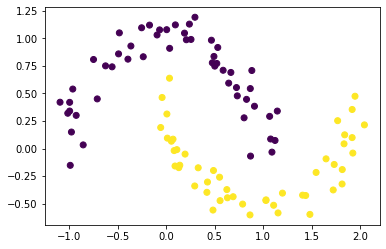

In [3]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np


x, y = make_moons(n_samples=200, noise=0.1)
x_test = x[100:]
x = x[:100]
y = y[:100]
plt.scatter(x[:,0], x[:,1], c = y);

[Text(167.4, 163.07999999999998, 'X[1] <= 0.266\ngini = 0.499\nsamples = 100\nvalue = [52, 48]'),
 Text(83.7, 54.360000000000014, 'gini = 0.241\nsamples = 50\nvalue = [7, 43]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.18\nsamples = 50\nvalue = [45, 5]')]

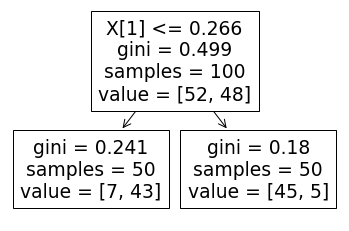

In [4]:
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Дерево глубиной 1
clf1 = DecisionTreeClassifier(max_depth=1) 
clf1.fit(x,y)
p1 = clf1.get_depth()
y_pred1 = clf1.predict(x_test)
plot_tree(clf1)

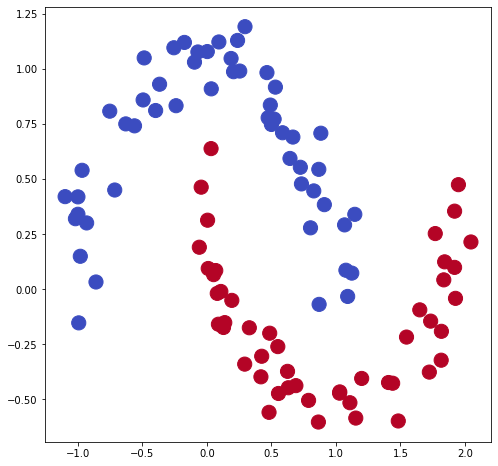

In [5]:
cmap = plt.cm.coolwarm
# Дерево глубиной 1
x1 = x_test[y_pred1==0]
plt.figure(figsize=(8,8))
plt.scatter(x[:,0], x[:,1], s = 200, c = y, cmap=cmap)

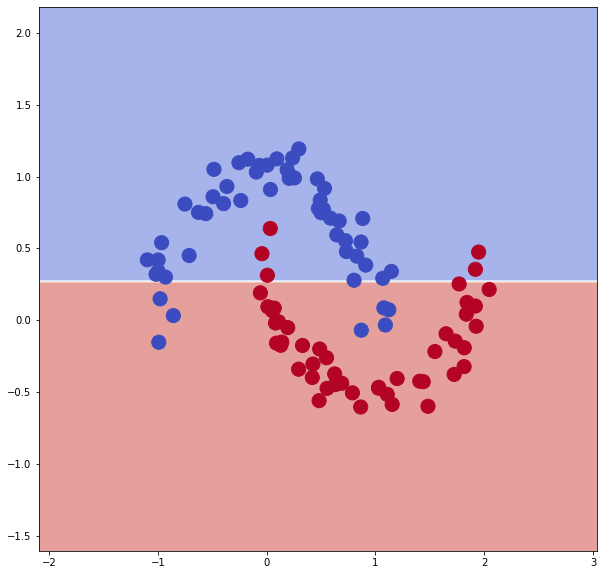

In [8]:
h = .03
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf1.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)

[Text(167.4, 181.2, 'X[1] <= 0.266\ngini = 0.499\nsamples = 100\nvalue = [52, 48]'),
 Text(83.7, 108.72, 'X[0] <= -0.458\ngini = 0.241\nsamples = 50\nvalue = [7, 43]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.156\nsamples = 47\nvalue = [4, 43]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 1.533\ngini = 0.18\nsamples = 50\nvalue = [45, 5]'),
 Text(209.25, 36.23999999999998, 'gini = 0.117\nsamples = 48\nvalue = [45, 3]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

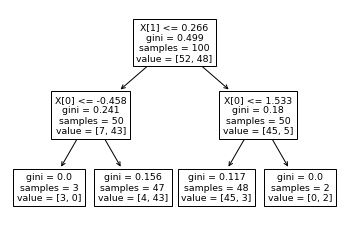

In [9]:
# Дерево глубиной 2
clf2 = DecisionTreeClassifier(max_depth=2) 
clf2.fit(x,y)
p2 = clf2.get_depth()
plot_tree(clf2)

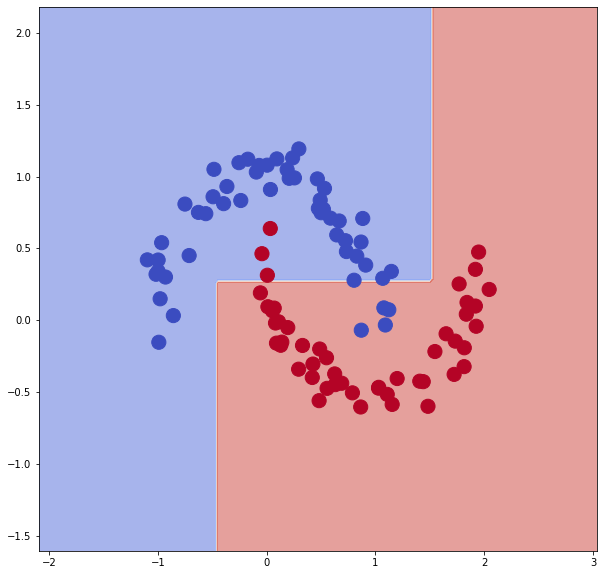

In [11]:
h = .03
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf2.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)

[Text(167.40000000000003, 190.26, 'X[1] <= 0.266\ngini = 0.499\nsamples = 100\nvalue = [52, 48]'),
 Text(66.96000000000001, 135.9, 'X[0] <= -0.458\ngini = 0.241\nsamples = 50\nvalue = [7, 43]'),
 Text(33.480000000000004, 81.53999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(100.44000000000001, 81.53999999999999, 'X[1] <= -0.081\ngini = 0.156\nsamples = 47\nvalue = [4, 43]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.36\nsamples = 17\nvalue = [4, 13]'),
 Text(267.84000000000003, 135.9, 'X[0] <= 1.533\ngini = 0.18\nsamples = 50\nvalue = [45, 5]'),
 Text(234.36, 81.53999999999999, 'X[1] <= 0.665\ngini = 0.117\nsamples = 48\nvalue = [45, 3]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(301.32000000000005, 81.53999999999999, '

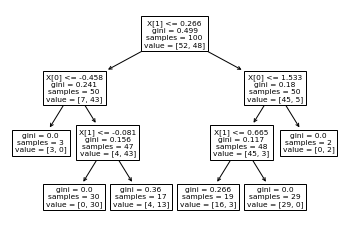

In [13]:
# Дерево глубиной 3
clf3 = DecisionTreeClassifier(max_depth=3) 
clf3.fit(x,y)
p3 = clf3.get_depth()
plot_tree(clf3)

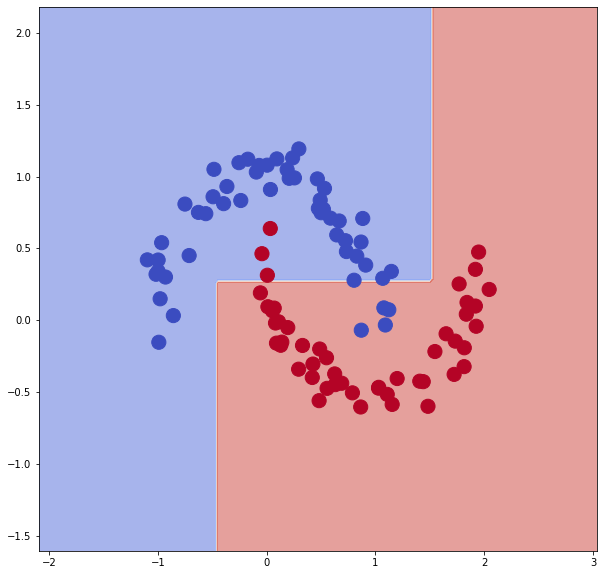

In [14]:
h = .03
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf3.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)

[Text(167.4, 201.90857142857143, 'X[1] <= 0.266\ngini = 0.499\nsamples = 100\nvalue = [52, 48]'),
 Text(47.82857142857143, 170.84571428571428, 'X[0] <= -0.458\ngini = 0.241\nsamples = 50\nvalue = [7, 43]'),
 Text(23.914285714285715, 139.78285714285715, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(71.74285714285715, 139.78285714285715, 'X[1] <= -0.081\ngini = 0.156\nsamples = 47\nvalue = [4, 43]'),
 Text(47.82857142857143, 108.72, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(95.65714285714286, 108.72, 'X[0] <= 0.532\ngini = 0.36\nsamples = 17\nvalue = [4, 13]'),
 Text(71.74285714285715, 77.65714285714284, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(119.57142857142857, 77.65714285714284, 'X[0] <= 1.446\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(95.65714285714286, 46.59428571428572, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(143.4857142857143, 46.59428571428572, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(286.9714285714286, 170.84571428571428, 'X[0]

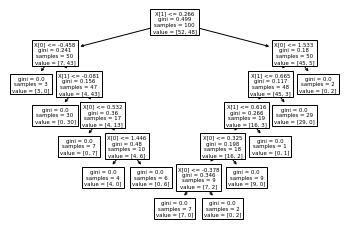

In [15]:
# Дерево максимальной глубины
clf4 = DecisionTreeClassifier(max_depth=None) 
clf4.fit(x,y)
p4 = clf4.get_depth()
plot_tree(clf4)

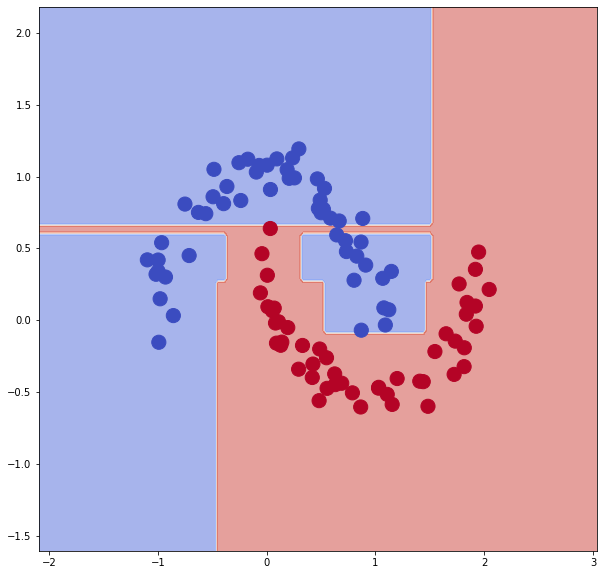

In [16]:
h = .03
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf4.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)